In [1]:
import numpy as np
from scipy.io import wavfile

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Audio

# Generating noise with given Fourier transform

$\hat{f}$

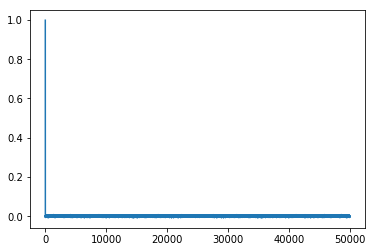

In [2]:
random_binary = np.random.binomial(2, p=0.5, size=50000)
x_b = np.fft.ifft(random_binary)
plt.plot(range(x_b.size), np.real(x_b))
Audio(data=np.real(x_b), rate=14440)

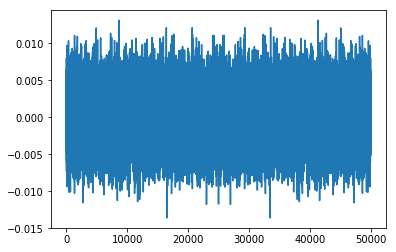

In [5]:
random_continuous = np.random.randn(50000)
x = np.fft.ifft(random_continuous)
plt.plot(range(x.size), np.real(x))
Audio(data=np.real(x), rate=14440)